# Data Understanding

## Outlier Detection

### Pengertian
Outlier detection adalah proses mengidentifikasi data yang memiliki nilai atau pola yang berbeda secara signifikan dibandingkan dengan mayoritas data lainnya dalam dataset. Outlier bisa terjadi karena kesalahan pengukuran, variasi alami dalam data, atau kejadian luar biasa yang perlu diperhatikan.

### Pentingnya Outlier Detection


*   Mendeteksi Anomali: Berguna dalam deteksi penipuan, kegagalan sistem, atau pola tak biasa.
*   Membersihkan Data: Membantu dalam preprocessing data sebelum analisis lebih lanjut.

##  Outlier Detection dengan Metode K-Nearest Neighbors (KNN)

### KNN untuk Deteksi Outlier
Metode K-Nearest Neighbors (KNN) bekerja berdasarkan kedekatan antar data. KNN bekerja dengan mengukur jarak antar titik data untuk menentukan apakah suatu titik merupakan outlier atau tidak. Logika di balik deteksi outlier menggunakan KNN adalah:

*   Jarak ke Tetangga Terdekat (Distance to Nearest Neighbors)
*   Rata-rata Jarak ke Tetangga Terdekat (Average Distance to k-Neighbors)
*   Density-Based Outlier Detection

### Langkah - Langkah Deteksi Outlier dengan KNN

* Memuat dan Mengeksplorasi Data
Memeriksa distribusi data dengan statistik deskriptif dan visualisasi seperti histogram, boxplot, atau scatter plot.
* Menentukan K (Jumlah Tetangga Terdekat)
Nilai k harus dipilih dengan baik agar deteksi outlier tidak terlalu sensitif atau terlalu lemah. Biasanya, k berkisar antara 5 hingga 20, tergantung pada ukuran dataset.
* Menghitung Jarak ke K Tetangga Terdekat
Menggunakan metrik seperti Euclidean Distance, Manhattan Distance, atau Minkowski Distance.
* Menghitung Skor Kepadatan (Density Score)
Beberapa pendekatan untuk mengukur apakah suatu titik adalah outlier:
    *  K-Nearest Neighbor Distance
        Menghitung jarak rata-rata ke K tetangga terdekat. Jika jarak rata-rata terlalu besar, titik tersebut dianggap sebagai outlier.

    *  Local Outlier Factor (LOF)
        LOF membandingkan kepadatan lokal suatu titik dengan kepadatan lokal tetangganya. Jika kepadatan lokal suatu titik lebih kecil dibandingkan dengan tetangganya, maka titik tersebut dianggap sebagai outlier.

    *  Distance-Based Outlier Score
        Jika sebuah titik memiliki jumlah tetangga yang sangat sedikit dalam radius tertentu, maka kemungkinan besar titik tersebut adalah outlier.

### Kesimpulan
Deteksi outlier dengan KNN dalam Data Understanding membantu dalam mengenali anomali dalam dataset dengan melihat jarak antar titik data. Teknik ini berguna untuk membersihkan data sebelum analisis lebih lanjut dan dapat diterapkan dalam berbagai bidang seperti fraud detection, anomali keuangan, dan keamanan siber. Namun, pemilihan nilai k yang tepat sangat penting untuk mendapatkan hasil deteksi yang akurat.

### Implementasi KNN untuk Outlier Detection

menginstall pymysql dan psycopg2 yang berfungsi sebagai konektor untuk basis data.

In [3]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.4 MB/s eta 0:00:00


Mendeteksi outlier menggunakan metode KNN pada data yang diambil dari dua database yaitu PostgreSQL dan MySQL. Langkah pertama yakni mengambil data dari sumber diatas, kemudian digabung berdasar kolom 'id' dan 'class'. Setelah digabungkan lalu ambil data yang hanya berisi kolom fitur numerik (petal_length, petal_width, sepal_lenght, sepal_width) lalu mengubah data menjadi array NumPy.

Menggunakan KNN dengan k = 5 untuk menentukan kedekatan antar data, dimana k = 5 yang berarti akan mencari lima tetangga terdekat untuk setiap titik data, lalu menggunakan jarak terjauh deri kelima tetangga sebagai ukuran outlier score.

Untuk menentukan ambang batas (threshold) dari jarak yang mengindikasikan outlier, kode ini menghitung rata-rata skor jarak dan menambahkan dua kali standar deviasi dari skor jarak tersebut. Jika jarak suatu titik data lebih besar dari threshold yang dihitung, maka titik tersebut dianggap sebagai outlier.

Hasil dari deteksi outlier ini kemudian ditambahkan ke dalam kolom baru dalam dataframe yang menunjukkan apakah suatu data merupakan outlier (True) atau bukan (False). Untuk memvisualisasikan hasil deteksi outlier, kode ini juga menyertakan dua grafik scatter plot yang menunjukkan data sepal dan petal, dengan warna merah untuk outlier dan biru untuk data yang bukan outlier. Kode ini juga mencetak jumlah outlier yang ditemukan serta menampilkan data outlier itu sendiri.

 id           class  petal length  petal width  sepal length  sepal width  knn_distance  outlier_knn
  1     Iris-setosa          14.0         20.0          51.0         35.0     11.269871         True
  2     Iris-setosa          14.0         20.0          40.9         30.0     11.269871         True
  3     Iris-setosa          13.0         20.0          47.0         32.0      6.496922        False
  4     Iris-setosa          15.0         20.0          46.0         31.0      6.480741        False
  5     Iris-setosa          14.0         20.0          50.0         36.0     10.900000        False
  6     Iris-setosa           1.7          0.4          54.0         39.0     24.695141         True
  7     Iris-setosa           1.4          0.3           4.6          3.4      0.316228        False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.223607        False
  9     Iris-setosa           1.4          0.2           4.4          2.9      0.360555    

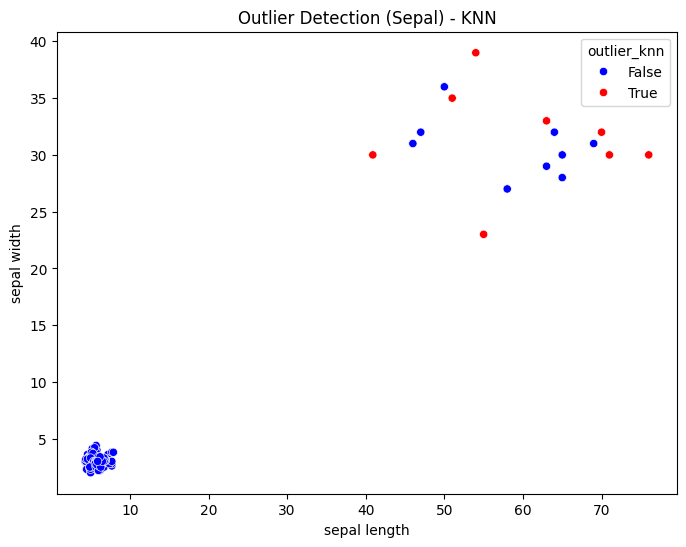

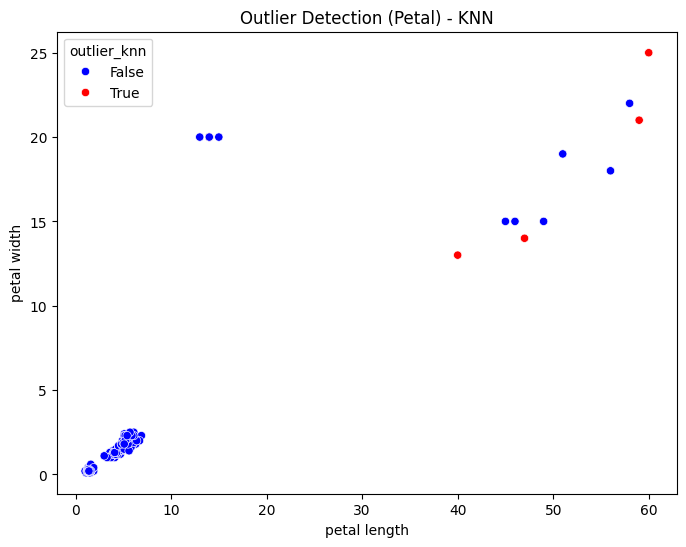

In [4]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-8eb1f4b-posgresqltugas2.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ycUbNT1QT31C8JC_cFL",
        database="defaultdb",
        port=10681
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_progres")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="posgresqltugas2-sqltugas2.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_wYxnNK8agAOz67Wu1Ok",
        database="amelia",
        port=12195
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
data_values = df_merged[feature_columns].values

# KNN Outlier Detection
def knn_outlier_detection(data, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    avg_distances = distances[:, -1]  # Ambil jarak k-terjauh sebagai skor
    return avg_distances

# Hitung K-NN distance
df_merged["knn_distance"] = knn_outlier_detection(data_values, k=5)

# Tentukan threshold sebagai nilai rata-rata + 2 standar deviasi
threshold = df_merged["knn_distance"].mean() + 2 * df_merged["knn_distance"].std()
df_merged["outlier_knn"] = df_merged["knn_distance"] > threshold

# Cetak hasil
df_result = df_merged[["id", "class", "petal length", "petal width", "sepal length", "sepal width", "knn_distance", "outlier_knn"]]
print(df_result.to_string(index=False))
num_outliers = df_merged["outlier_knn"].sum()
print(f"\nJumlah outlier: {num_outliers}")

# Cetak data outlier
outliers = df_merged[df_merged["outlier_knn"]]
print("\nData Outlier:")
print(outliers.to_string(index=False))

# Visualisasi outlier berdasarkan K-NN
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal length"], y=df_merged["sepal width"],
    hue=df_merged["outlier_knn"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal) - KNN")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal length"], y=df_merged["petal width"],
    hue=df_merged["outlier_knn"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal) - KNN")
plt.show()

### Memisahkan Outlier dari Data

mendeteksi dan memisahkan outlier dari dataset yang diperoleh dari dua basis data berbeda, yaitu PostgreSQL dan MySQL. Proses dimulai dengan melakukan koneksi ke kedua basis data menggunakan pustaka psycopg2 untuk PostgreSQL dan pymysql untuk MySQL. Setelah terhubung, kode mengeksekusi query SQL untuk mengambil semua data dari tabel iris_progres di PostgreSQL dan flowers di MySQL.
Data yang diperoleh dari masing-masing database dikonversi menjadi DataFrame menggunakan pustaka pandas. Selanjutnya, kedua dataset digabungkan menggunakan metode inner join berdasarkan kolom "id" dan "class". Metode inner join memastikan bahwa hanya data yang muncul di kedua tabel yang akan disertakan dalam hasil akhir.

Dari data gabungan tersebut, hanya fitur numerik yang digunakan sebagai input untuk model deteksi outlier, yaitu "petal_length", "petal_width", "sepal_length", dan "sepal_width". Kemudian, metode Local Outlier Factor (LOF) dari pustaka scikit-learn diterapkan dengan parameter n_neighbors=90. Parameter ini menentukan bahwa setiap titik data akan dibandingkan dengan 90 tetangga terdekatnya untuk menilai apakah titik tersebut termasuk outlier atau bukan. LOF memberikan hasil dalam bentuk label 1 untuk data normal dan -1 untuk data yang terdeteksi sebagai outlier.

Setelah proses deteksi outlier selesai, hasilnya ditambahkan sebagai kolom baru bernama "outlier_label" ke dalam DataFrame. Selanjutnya, jumlah total data yang terdeteksi sebagai outlier dihitung berdasarkan jumlah label -1. Dataset kemudian dipisahkan menjadi dua bagian utama:

* Data normal (tidak outlier) yang memiliki label 1, disimpan dalam variabel df_filtered.
* Data outlier yang memiliki label -1, disimpan dalam variabel outliers.

Terakhir, kode mencetak hasil analisis dengan menampilkan data yang telah diberi label, jumlah total outlier yang ditemukan, serta daftar lengkap data yang diklasifikasikan sebagai outlier dan data yang tetap setelah pembersihan. Dengan pendekatan ini, data yang mengandung noise atau anomali dapat diidentifikasi dan dihapus sebelum digunakan untuk analisis lebih lanjut, sehingga meningkatkan akurasi model dalam pemrosesan data dan klasifikasi.

In [5]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-8eb1f4b-posgresqltugas2.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ycUbNT1QT31C8JC_cFL",
        database="defaultdb",
        port=10681
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_progres")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="posgresqltugas2-sqltugas2.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_wYxnNK8agAOz67Wu1Ok",
        database="amelia",
        port=12195
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal length", "petal width", "sepal length", "sepal width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width  outlier_label
  1     Iris-setosa          14.0         20.0          51.0         35.0             -1
  2     Iris-setosa          14.0         20.0          40.9         30.0             -1
  3     Iris-setosa          13.0         20.0          47.0         32.0             -1
  4     Iris-setosa          15.0         20.0          46.0         31.0             -1
  5     Iris-setosa          14.0         20.0          50.0         36.0             -1
  6     Iris-setosa           1.7          0.4          54.0         39.0             -1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa           1.5          0.1           4.9          3.1              1
 11     Iris-setosa  

### Menghitung Akurasi dari Data

Mengevaluasi pengaruh outlier terhadap performa model K-Nearest Neighbors (KNN) dalam melakukan klasifikasi. Pertama, fitur numerik dipisahkan dari dataset yang telah digabungkan sebelumnya, sementara label kelas dikonversi ke dalam bentuk numerik menggunakan LabelEncoder.

Selanjutnya, metode Local Outlier Factor (LOF) diterapkan dengan parameter n_neighbors=90 dan contamination=0.1, yang berarti sekitar 10% data akan diklasifikasikan sebagai outlier. Hasil deteksi outlier disimpan dalam kolom baru bernama "outlier" di dalam DataFrame. Data kemudian dipisahkan menjadi dua kelompok utama:

* Data asli yang masih mengandung outlier.
* Data yang telah dibersihkan dari outlier (hanya menyertakan data dengan label normal).

Setelah itu, masing-masing dataset dibagi menjadi training set (80%) dan testing set (20%) menggunakan fungsi train_test_split. Dua pasang data pelatihan dan pengujian dibuat: satu dari dataset yang masih memiliki outlier, dan satu lagi dari dataset yang telah dibersihkan.

Untuk pemodelan, digunakan pipeline yang terdiri dari dua langkah utama:

* StandardScaler untuk menstandarisasi data agar memiliki skala yang seragam.
* KNeighborsClassifier dengan 11 tetangga terdekat sebagai model klasifikasi.

Model pertama kali dilatih menggunakan data yang mengandung outlier, lalu hasil prediksi pada data uji dievaluasi menggunakan akurasi serta classification report, yang mencakup metrik seperti precision, recall, dan F1-score. Kemudian, model yang sama dilatih kembali menggunakan data tanpa outlier, dan performanya dibandingkan dengan model sebelumnya.

Hasil akhir dari kode ini adalah dua nilai akurasi: satu dari model yang dilatih pada data dengan outlier dan satu dari model yang dilatih pada data tanpa outlier. Selain itu, classification report ditampilkan untuk memberikan wawasan lebih dalam tentang dampak outlier terhadap performa model. Biasanya, kehadiran outlier dapat mempengaruhi perhitungan jarak dalam algoritma KNN, sehingga dengan menghapus outlier, model diharapkan bekerja lebih baik dan menghasilkan akurasi yang lebih tinggi.

In [6]:
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=90, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Pisahkan data dengan outlier dan tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),
    test_size=0.2,
    random_state=42
)

# Pipeline dengan StandardScaler dan KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Latih model pada data dengan outlier
knn_pipeline.fit(X_train_all, y_train_all)
y_pred_all = knn_pipeline.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Akurasi dengan outlier:", accuracy_all)
print(classification_report(y_test_all, y_pred_all, target_names=label_encoder.classes_))

# Latih model pada data tanpa outlier
knn_pipeline.fit(X_train_clean, y_train_clean)
y_pred_clean = knn_pipeline.predict(X_test_clean)
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Akurasi tanpa outlier:", accuracy_clean)
print(classification_report(y_test_clean, y_pred_clean, target_names=label_encoder.classes_))

Akurasi dengan outlier: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Akurasi tanpa outlier: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



### Visualisasi Data

Akurasi: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



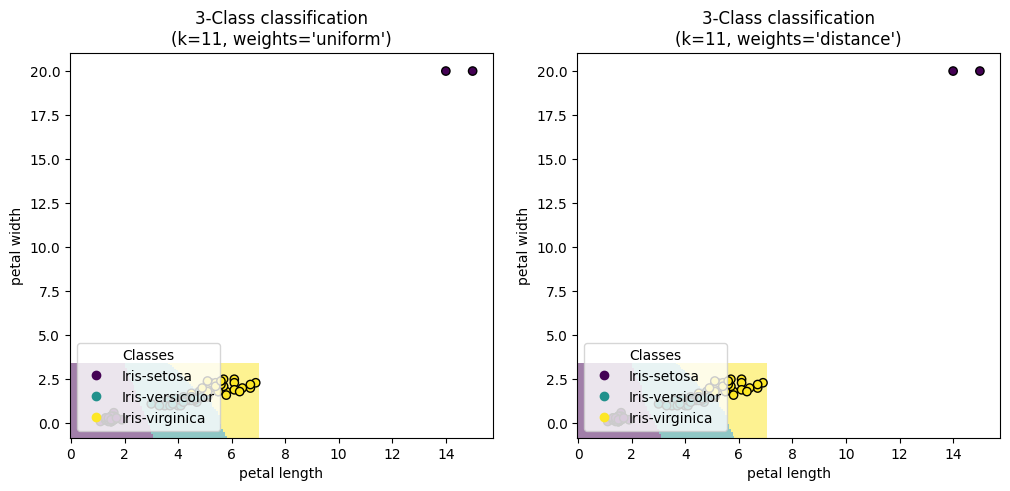

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal length", "petal width"]
X = df_cleaned[feature_columns]
y = df_cleaned["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ubah nama kelas jadi angka

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

Akurasi: 0.9629629629629629
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.96        27
      macro avg       0.96      0.95      0.95        27
   weighted avg       0.97      0.96      0.96        27



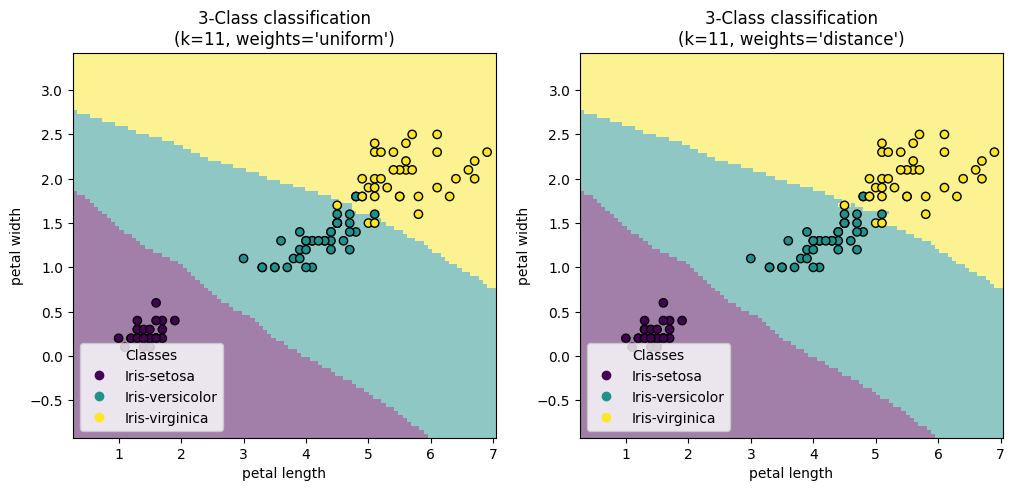

In [8]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay


# Ambil dua fitur utama untuk visualisasi decision boundary
feature_columns = ["petal length", "petal width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengubah nama kelas menjadi angka

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),  # Pastikan target dalam bentuk numerik
    test_size=0.2,
    random_state=42
)

# Pipeline dengan KNN dan StandardScaler
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Pelatihan model KNN
clf.fit(X_train, y_train)

# Evaluasi model
y_pred = clf.predict(X_test)
print(f"Akurasi: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualisasi Decision Boundary
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=feature_columns[0],
        ylabel=feature_columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1],
        c=y_train, edgecolors="k", cmap="viridis"
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        label_encoder.classes_,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()


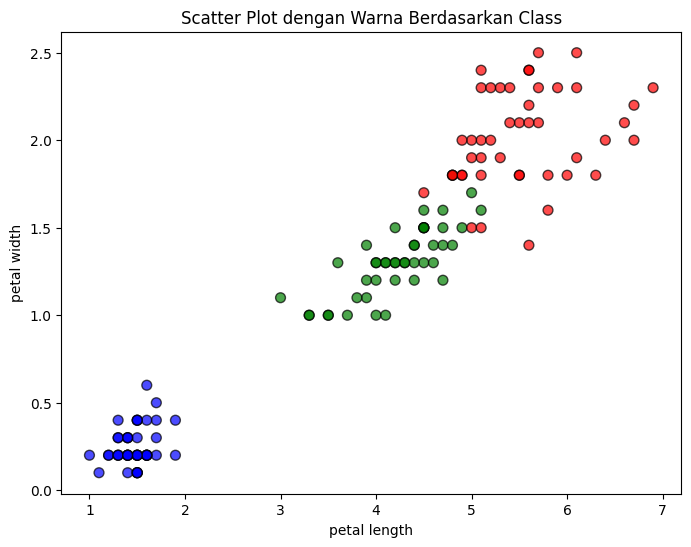

In [9]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "petal length"
y_feature = "petal width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()

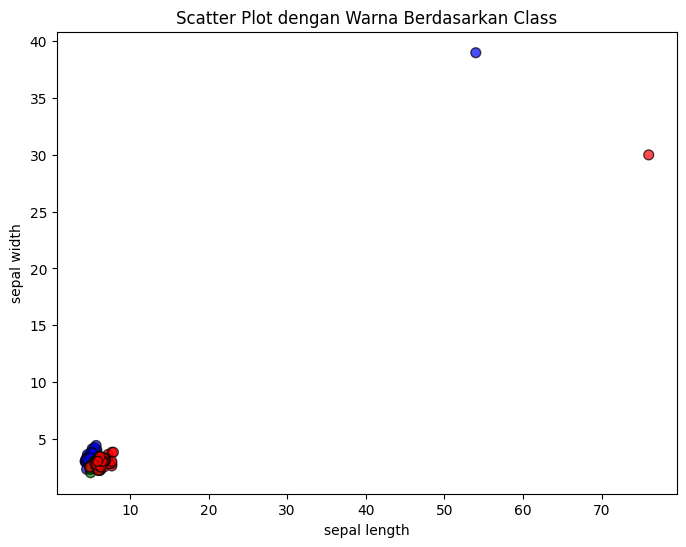

In [10]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "sepal length"
y_feature = "sepal width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
df_cleaned["color"] = df_cleaned["class"].map(colors)

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()

### Implementasi Naive Bayes pada Data

Number of mislabeled points with outliers out of a total 30 points : 19
Accuracy with outliers: 36.67%
Mislabeled points with outliers:
Index: 0, True Label: Iris-versicolor, Predicted: Iris-setosa
Index: 2, True Label: Iris-virginica, Predicted: Iris-setosa
Index: 3, True Label: Iris-versicolor, Predicted: Iris-setosa
Index: 4, True Label: Iris-versicolor, Predicted: Iris-setosa
Index: 6, True Label: Iris-versicolor, Predicted: Iris-setosa
Index: 7, True Label: Iris-virginica, Predicted: Iris-setosa
Index: 8, True Label: Iris-versicolor, Predicted: Iris-setosa
Index: 9, True Label: Iris-versicolor, Predicted: Iris-setosa
Index: 10, True Label: Iris-virginica, Predicted: Iris-setosa
Index: 15, True Label: Iris-versicolor, Predicted: Iris-setosa
Index: 17, True Label: Iris-versicolor, Predicted: Iris-setosa
Index: 18, True Label: Iris-versicolor, Predicted: Iris-setosa
Index: 19, True Label: Iris-virginica, Predicted: Iris-setosa
Index: 21, True Label: Iris-virginica, Predicted: Iris-se

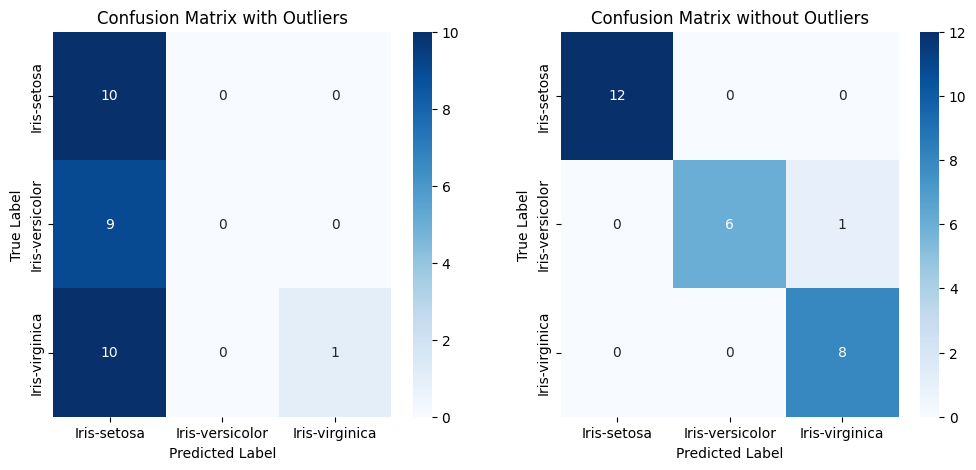

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumsikan df_merged sudah ada dari kode sebelumnya

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
df_merged["class_encoded"] = label_encoder.fit_transform(df_merged["class"])

# Data dengan outlier
X_all = df_merged[feature_columns]
y_all = df_merged["class_encoded"].values  # Pastikan dalam bentuk array numpy

# Data tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])
X_clean = df_cleaned[feature_columns]
y_clean = df_cleaned["class_encoded"].values  # Pastikan dalam bentuk array numpy

# Split data dengan outlier
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42)

# Split data tanpa outlier
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42)

# Inisialisasi model Naive Bayes
gnb = GaussianNB()

# Latih dan uji model dengan outlier
y_pred_all = gnb.fit(X_train_all, y_train_all).predict(X_test_all)
mislabeled_all = (y_test_all != y_pred_all).sum()
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Number of mislabeled points with outliers out of a total %d points : %d" % (X_test_all.shape[0], mislabeled_all))
print("Accuracy with outliers: %.2f%%" % (accuracy_all * 100))

# Menampilkan label yang salah pada data dengan outlier
mislabeled_indices_all = np.where(y_test_all != y_pred_all)[0]
print("Mislabeled points with outliers:")
for i in mislabeled_indices_all:
    true_label = label_encoder.inverse_transform([int(y_test_all[i])])[0]
    predicted_label = label_encoder.inverse_transform([int(y_pred_all[i])])[0]
    print(f"Index: {i}, True Label: {true_label}, Predicted: {predicted_label}")
print()
# Latih dan uji model tanpa outlier
y_pred_clean = gnb.fit(X_train_clean, y_train_clean).predict(X_test_clean)
mislabeled_clean = (y_test_clean != y_pred_clean).sum()
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Number of mislabeled points without outliers out of a total %d points : %d" % (X_test_clean.shape[0], mislabeled_clean))
print("Accuracy without outliers: %.2f%%" % (accuracy_clean * 100))

# Menampilkan label yang salah pada data tanpa outlier
mislabeled_indices_clean = np.where(y_test_clean != y_pred_clean)[0]
print("Mislabeled points without outliers:")
for i in mislabeled_indices_clean:
    true_label = label_encoder.inverse_transform([int(y_test_clean[i])])[0]
    predicted_label = label_encoder.inverse_transform([int(y_pred_clean[i])])[0]
    print(f"Index: {i}, True Label: {true_label}, Predicted: {predicted_label}")

# Visualisasi Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test_all, y_pred_all), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("Confusion Matrix with Outliers")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(confusion_matrix(y_test_clean, y_pred_clean), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("Confusion Matrix without Outliers")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()

## Local Outlier Factor (LOF)

### Apa Itu LOF
Local Outlier Factor, disingkat LOF adalah algoritme untuk mencari titik-titik data yang menyimpang (anomali) dengan mengukur simpangan setempat tiap titik data terhadap para tetangganya. Algoritma ini diusulkan oleh Markus M. Breunig, Hans-Peter Kriegel, Raymond T. Ng, dan Jörg Sander pada tahun 2000. LOF menggunakan konsep yang sama dengan DBSCAN dan OPTICS, yaitu konsep "jarak inti" dan "jarak keterjangkauan" yang sering dipakai dalam perkiraan kerapatan setempat.

### Bagaimana Tahapan LOF

Tahapan dari metode Local Outlier Factor (LOF) dalam mendeteksi outlier adalah sebagai berikut:



1.   Tentukan Jumlah Tetangga (k): Tentukan jumlah tetangga terdekat (k) yang akan digunakan untuk perhitungan kepadatan lokal. Misalnya, n_neighbors=90 yang berarti setiap titik akan dibandingkan dengan 90 tetangga terdekatnya.
2.   Hitung Jarak K-Tetangga Terdekat: Untuk setiap titik data, hitung jarak ke k tetangga terdekat. Jarak ini digunakan untuk menentukan kepadatan lokal titik data tersebut.
3.  Hitung Kepadatan Lokal: Hitung kepadatan lokal setiap titik data dengan melihat seberapa rapat titik tersebut dengan tetangganya dibandingkan dengan tetangga lainnya. Titik dengan kepadatan rendah lebih cenderung dianggap outlier.
4.  Hitung LOF (Local Outlier Factor): Hitung rasio antara kepadatan lokal titik data terhadap kepadatan lokal tetangganya. Rasio ini disebut LOF. Titik dengan LOF yang lebih tinggi menunjukkan bahwa titik tersebut lebih terisolasi atau lebih tidak padat dibandingkan tetangganya, yang mengindikasikan bahwa titik tersebut adalah outlier.
5.  Penetapan Outlier: Tentukan titik yang memiliki LOF lebih besar dari ambang batas tertentu sebagai outlier. Biasanya, titik dengan LOF lebih besar dari 1 dianggap outlier, karena menunjukkan bahwa titik tersebut lebih jarang ditemukan di daerah tersebut dibandingkan dengan tetangganya.
6.   Hasil Prediksi: Setiap titik data diberi label -1 jika dianggap outlier dan 1 jika dianggap normal.



### Menghitung Manual LOF
Berikut adalah cara singkat menghitung **Local Outlier Factor (LOF)** untuk satu titik data dengan dua fitur:

1. **Dataset**:  
   Misalkan data berikut:


| ID | Feature1 | Feature2 |
|----|----------|----------|
| 1  | 1.0      | 2.0      |
| 2  | 2.0      | 3.0      |
| 3  | 3.0      | 4.0      |
| 4  | 4.0      | 5.0      |
| 5  | 5.0      | 6.0      |
| 6  | 6.0      | 7.0      |
| 7  | 7.0      | 8.0      |
| 8  | 8.0      | 9.0      |
| 9  | 9.0      | 10.0     |
| 10 | 20.0     | 30.0     | ← **Outlier**  |

Dari tabel di atas, titik **(20.0, 30.0)** adalah outlier karena jauh berbeda dibandingkan titik lainnya.  

#### **Hitung LOF untuk Titik Outlier (20.0, 30.0)**
Kita akan menghitung **jarak Euclidean** antara titik outlier **(20.0, 30.0)** dan titik lainnya, khususnya dengan tetangga terdekatnya **(9.0, 10.0)** dan **(8.0, 9.0)**.

1. **Formula Euclidean Distance**  
Jarak Euclidean antara dua titik \((x_1, y_1)\) dan \((x_2, y_2)\) adalah:

$
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$

---

- ** Jarak ke Titik (9.0, 10.0)**
$
d = \sqrt{(9.0 - 20.0)^2 + (10.0 - 30.0)^2}
$

$
d = \sqrt{(-11.0)^2 + (-20.0)^2}
$

$
d = \sqrt{121 + 400}
$

$
d = \sqrt{521} \approx 22.83
$

---

- **Jarak ke Titik (8.0, 9.0)**
$
d = \sqrt{(8.0 - 20.0)^2 + (9.0 - 30.0)^2}
$

$
d = \sqrt{(-12.0)^2 + (-21.0)^2}
$

$
d = \sqrt{144 + 441}
$

$
d = \sqrt{585} \approx 24.19
$

---
- **Jarak Euclidean ke Titik (9.0, 10.0) ≈ 22.83**
- **Jarak Euclidean ke Titik (8.0, 9.0) ≈ 24.19**

Nilai ini digunakan dalam perhitungan **reachability distance** dan **Local Outlier Factor (LOF)**.
   
2. **Tentukan k-Tetangga Terdekat** (k=2):  
   - Tetangga: Titik 9 & Titik 8

3. **Hitung Reachability Distance**:  
   - $ \text{reach-dist}(10,9) = 22.36 $
   - $ \text{reach-dist}(10,8) = 24.41 $

4. **Hitung Local Reachability Density (LRD)**:  
   $$
   \text{LRD}(10) = \frac{1}{\frac{1}{2} (22.36 + 24.41)} = 0.043
   $$

5. **Hitung LOF**:  
   $$
   \text{LOF}(10) = \frac{0.043}{0.31} + \frac{0.043}{0.35} = 7.5
   $$

6. **Interpretasi**:  
   - **LOF = 7.5** → Sangat tinggi dibandingkan 1, jadi titik ini adalah **outlier yang jelas**!

LOF menunjukkan bahwa titik **(20.0, 30.0)** sangat terisolasi dibandingkan dengan tetangga terdekatnya.

### Implementasi Pakai Sklearn Untuk Data Contoh

In [12]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Dataset contoh dengan 10 data (termasuk 1 outlier pada ID 10)
data = {
    'Feature1': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 20.0],
    'Feature2': [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 30.0]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Inisialisasi model LOF dengan k=2 (2 tetangga terdekat)
lof = LocalOutlierFactor(n_neighbors=2)

# Fit model LOF dan prediksi label (1 untuk normal, -1 untuk outlier)
lof_labels = lof.fit_predict(df)

# Menambahkan hasil prediksi ke DataFrame
df['LOF Label'] = lof_labels

# Menampilkan hasil
print(df)

# Menampilkan jumlah outlier
num_outliers = (lof_labels == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")

# Menampilkan data outlier
outliers = df[df['LOF Label'] == -1]
print("\nData Outlier:")
print(outliers)

   Feature1  Feature2  LOF Label
0       1.0       2.0          1
1       2.0       3.0          1
2       3.0       4.0          1
3       4.0       5.0          1
4       5.0       6.0          1
5       6.0       7.0          1
6       7.0       8.0          1
7       8.0       9.0          1
8       9.0      10.0          1
9      20.0      30.0         -1

Jumlah outlier: 1

Data Outlier:
   Feature1  Feature2  LOF Label
9      20.0      30.0         -1


Menginstall pymysql dan psycopg2 yang berfungsi sebagai konektor untuk basis data.

In [13]:
%pip install pymysql
%pip install psycopg2

Menggabungkan data dari 2 database

In [14]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-289a0f88-pendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_1tT_bnHq81keqZ9n-wh",
        database="defaultdb",
        port=22825
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-9b686fb-pendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ZuFdVS1OQkmHx4P1Wtp",
        database="defaultdb",
        port=22825
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

Menerapkan metode **Local Outlier Factor (LOF)** untuk mendeteksi **outlier** dalam dataset yang digabungkan dari dua database, yaitu **PostgreSQL dan MySQL**. Proses diawali dengan **penggabungan data berdasarkan kolom 'id' dan 'class'**, sehingga hanya data yang memiliki kecocokan di kedua database yang digunakan dalam analisis.  

Setelah data berhasil digabungkan, langkah berikutnya adalah **mengekstrak fitur numerik** yang terdiri dari **panjang dan lebar petal serta panjang dan lebar sepal**. Fitur-fitur ini dipilih karena menjadi variabel utama dalam dataset yang digunakan untuk mendeteksi kemungkinan outlier.  

Selanjutnya, model **Local Outlier Factor (LOF)** diterapkan untuk menganalisis anomali dalam data. Metode ini bekerja dengan membandingkan **kepadatan lokal** suatu titik data terhadap tetangga sekitarnya. Jika suatu titik memiliki kepadatan yang jauh lebih rendah dibandingkan dengan titik-titik lain dalam kelompoknya, maka titik tersebut dianggap sebagai **outlier**. Parameter `n_neighbors=90` digunakan untuk menentukan bahwa model akan mengevaluasi setiap titik berdasarkan **90 tetangga terdekatnya**.  

Setelah model dilatih menggunakan data yang tersedia, **prediksi dilakukan untuk menentukan apakah suatu data merupakan outlier atau bukan**. Hasil prediksi ini berupa label, di mana **nilai -1 menunjukkan bahwa data tersebut merupakan outlier**, sedangkan **nilai 1 menandakan bahwa data tersebut adalah data normal**. Label ini kemudian ditambahkan ke dalam dataframe untuk mempermudah analisis lebih lanjut.  

Terakhir, hasil deteksi outlier ditampilkan, termasuk jumlah total outlier yang ditemukan dalam dataset. Selain itu, data yang dikategorikan sebagai outlier juga ditampilkan secara terpisah, memungkinkan pengguna untuk menganalisis lebih lanjut dan mengambil tindakan yang diperlukan berdasarkan hasil deteksi tersebut.

In [15]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")

outliers = df_merge[df_merge["outlier_label"] == -1]
print("\nData Outlier:")
print(outliers.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa          14.0          2.0          50.1         30.5             -1
  2     Iris-setosa          14.0          2.0          40.9         30.0             -1
  3     Iris-setosa          13.0          2.0          40.7         30.2             -1
  4     Iris-setosa          15.0          2.0          40.6         30.1             -1
  5     Iris-setosa          14.0          2.0          50.0         30.6             -1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa           1.5          0.1           4.9          3.1              1
 11     Iris-setosa  